## Observations and Insights 

## OBSERVATIONS

1. Capomulin and Ramicane appeared to be the most stable of all the regimens, seeing that they had the smallest standard deviations and variances across all regimens. These two regimens also had the most participating mice, which may lean more towards a sample size skew than a performance skew. More participants should be tested in other higher performing regimens to avoid this skewing.
2. Female to Male was kept fairly consistent overall in the experiments. Additional analysis could be done to determine whether a specific gender is more likely to have improved results per Regimen, especially if the risk factors for SCC are relevant for gender.
3. Of the 'Promising Treatments' Infubinol and Ceftamin had much higher tails in the box plot graphs. These wider quartile ranges and upper and lower bound would cause me to increase the amount of testing of those specifically to see if a higher population size would normalize the data a little bit better. Otherwise, those two specifically have harder to pin down expectations.
4. There isn't a "strong" correlation between weight and tumor volume for Capomulin treated mice, but it's not totally non-correlated either. What I found interesting is the less the mouse weighed the more spread the results of the tumor size were. Whereas the heavier the mouse, the more concentrated the tumor volumes were as well. I'm not sure if this means anything, but seemed interesting nonetheless

## OVERALL COMMENTS

1. I am not a "Science" type person, so I had an extra challenge of trying to understand what I was trying to accomplish in this exercise. I also tended not to use some of the existing notes, which could have been to my detriment.
2. I could not get the indivdual summary statistics to print together in one DataFrame and I have no idea why. I tried it probably 15-20 times, with varying code options, but could not get it to run. As it is 11:50ish, I have no option but to turn the homework in as is.
3. This a difficult assignment for me. I also don't really do a lot of statistics in my day-to-day, so I found myself just googling what exactly I was trying to accomplish, so I could guess whether my outputs would pass the "sniff test" for a stats graph. I'm not sure if I was successful in that or not. We shall see.

In [326]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [327]:
# Checking the number of mice.
unique_mice = combined_df["Mouse ID"].nunique()
unique_mice

249

In [328]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Dupe_mice = combined_df.groupby(["Mouse ID","Timepoint"]).count()

#Selecting a column for isolating the duplicate mouse ID
Dupe_mice_2 = Dupe_mice[Dupe_mice["Drug Regimen"]>1]
Dupe_mice_2

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [329]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df_dupe = combined_df[combined_df["Mouse ID"]=="g989"]
combined_df_dupe


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [330]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df[combined_df["Mouse ID"]!="g989"]
clean_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [331]:
# Checking the number of mice in the clean DataFrame.
unique_mice_clean = clean_combined_df["Mouse ID"].nunique()
unique_mice_clean


248

## Summary Statistics

In [433]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_list_clean = clean_combined_df[["Drug Regimen","Tumor Volume (mm3)"]]

tumor_list_regimens = clean_combined_df["Drug Regimen"].unique()
tumor_list_f = pd.DataFrame(tumor_list_regimens)


tumor_mean_reg = tumor_list_clean.groupby("Drug Regimen").mean()

tumor_med_reg = tumor_list_clean.groupby("Drug Regimen").median()

tumor_var_reg = tumor_list_clean.groupby('Drug Regimen').var()

tumor_std_reg = tumor_list_clean.groupby('Drug Regimen').std()

tumor_sem_reg = tumor_list_clean.groupby('Drug Regimen').sem()

summary_df = [{"Regimens":tumor_list_f,
                            "Mean": tumor_mean_reg,
                            "Median": tumor_med_reg,
                            "Variance": tumor_var_reg,
                            "Standard Deviation": tumor_std_reg,
                            "SEM": tumor_sem_reg,}]
summary_dff = pd.DataFrame(summary_df)
summary_dff

,Regimens,Mean,Median,Variance,Standard Deviation,SEM
0,0 0 Ramicane 1 Capomulin 2 Infu...,Tumor Volume (mm3) Drug Regimen ...,Tumor Volume (mm3) Drug Regimen ...,Tumor Volume (mm3) Drug Regimen ...,Tumor Volume (mm3) Drug Regimen ...,Tumor Volume (mm3) Drug Regimen ...


In [333]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_group_by = tumor_list_clean.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])
tumor_group_by
# This method produces everything in a single groupby function

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

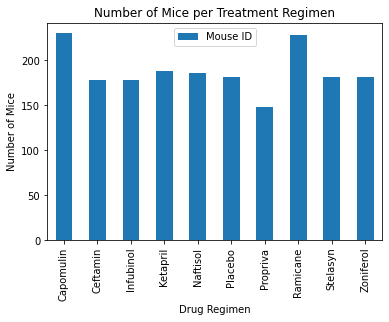

In [334]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_plot = clean_combined_df[["Mouse ID","Drug Regimen"]]

bar_plot_count = bar_plot.groupby("Drug Regimen").count()
bar_plot_count.plot.bar()
plt.title("Number of Mice per Treatment Regimen")
plt.ylabel("Number of Mice")

Text(0.5, 0, 'Drug Regimen')

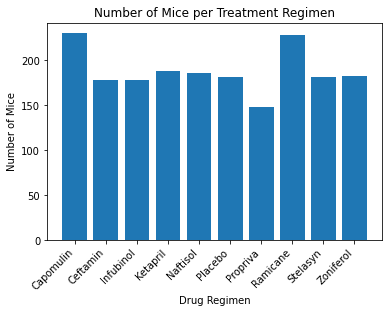

In [335]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
py_bar = bar_plot_count

plt.bar(py_bar.index,py_bar['Mouse ID'])
plt.xticks(rotation = 45, ha="right")
plt.title("Number of Mice per Treatment Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")

Text(0.5, 1.0, 'Representation of Each Sex in Experiments')

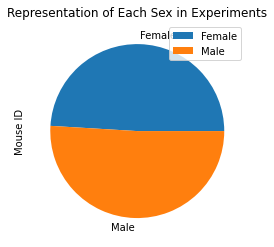

In [336]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_plot = clean_combined_df[["Mouse ID","Sex"]]

pie_plot_count = pie_plot.groupby("Sex").count()
pie_plot_count.plot.pie(subplots = True)
plt.title("Representation of Each Sex in Experiments")

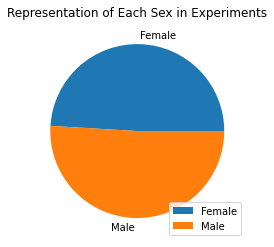

In [337]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plotlib_pie = plt.pie(pie_plot_count["Mouse ID"], labels=pie_plot_count.index)
plt.title("Representation of Each Sex in Experiments")
plt.legend(loc="lower right")

## Quartiles, Outliers and Boxplots

In [338]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create smaller df to work with 
final_vol_df = combined_df[["Mouse ID","Drug Regimen","Timepoint"]]

# Filter out non-essential treatments
final_vol_df_filt = final_vol_df[final_vol_df["Drug Regimen"].eq("Capomulin") | final_vol_df["Drug Regimen"].eq("Ramicane")|\
                                 final_vol_df["Drug Regimen"].eq("Infubinol") | final_vol_df["Drug Regimen"].eq("Ceftamin")]

# Drop treatment so the merge doesn't duplicate later (don't know another way to do this)
final_vol_df_filt = final_vol_df_filt[["Mouse ID","Timepoint"]]

# Start by getting the last (greatest) timepoint for each mouse
max_mouse = final_vol_df_filt.groupby("Mouse ID")
max_mouse.max("Timepoint")
max_mouse_df = max_mouse.max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(max_mouse_df, combined_df, on=("Mouse ID","Timepoint"),how="left")
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
5,a520,45,Ramicane,Male,13,21,38.810366,1
6,a577,30,Infubinol,Female,6,25,57.031862,2
7,a644,45,Ramicane,Female,7,17,32.978522,1
8,a685,45,Infubinol,Male,8,30,66.083066,3
9,b128,45,Capomulin,Female,9,22,38.982878,2


In [339]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
lower_quartile = []
upper_quartile = []
int_quart_range = []
median_tum = []
poss_low_out = []
poss_high_out = []

#do for loop, this seems inefficient, but idk, it's a shot in the dark here
for treatment in treatments:
    merge_df_t1 = merge_df[merge_df["Drug Regimen"]==f"{treatment}"]
    merge_df_t1_f = merge_df_t1["Tumor Volume (mm3)"]
    quartiles = merge_df_t1_f.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    lower_quartile.append(lowerq)
    upperq = quartiles[0.75]
    upper_quartile.append(upperq)
    iqr = upperq-lowerq
    int_quart_range.append(iqr)
    median_tum.append(quartiles[.5])
    lower_bound = lowerq - (1.5*iqr)
    poss_low_out.append(lower_bound)
    upper_bound = upperq + (1.5*iqr)
    poss_high_out.append(upper_bound)
    
# Create summary table with all the lists I created above
summary_tumor_stats_df = {"Treatment":treatments,
                          "Lower Quartile":lower_quartile,
                          "Upper Quartile":upper_quartile,
                          "Interquartile Range":int_quart_range,
                          "Median":median_tum,
                          "Lower Bound":poss_low_out,
                          "Upper Bound":poss_high_out,
}
#convert to DataFrame and Transpose for the Box Plot (again no idea here)
final_tumor_stats_df = pd.DataFrame(summary_tumor_stats_df)
final_t = final_tumor_stats_df.set_index("Treatment").T
final_t

Treatment,Capomulin,Ramicane,Infubinol,Ceftamin
Lower Quartile,32.377357,31.560470,54.048608,48.722078
Upper Quartile,40.159220,40.659006,65.525743,64.299830
Interquartile Range,7.781863,9.098537,11.477135,15.577752
Median,38.125164,36.561652,60.165180,59.851956
Lower Bound,20.704562,17.912664,36.832905,25.355450
Upper Bound,51.832015,54.306811,82.741446,87.666458


Text(0.5, 0, 'Drug Regimen')

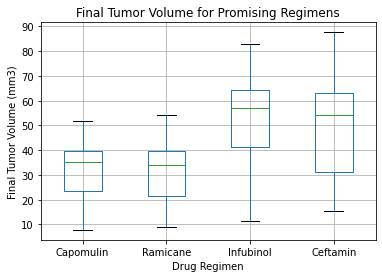

In [340]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_t.boxplot()
plt.title('Final Tumor Volume for Promising Regimens')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

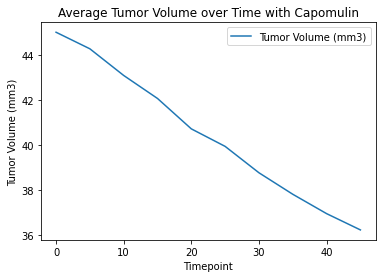

In [341]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = clean_combined_df[clean_combined_df["Drug Regimen"]=="Capomulin"]
cap_df_trim = cap_df[["Timepoint","Tumor Volume (mm3)"]]
cap_df_trim_gp = cap_df_trim.groupby("Timepoint").mean()
cap_df_trim_gp.plot.line()
plt.title("Average Tumor Volume over Time with Capomulin")
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Tumor Volume (mm3)')

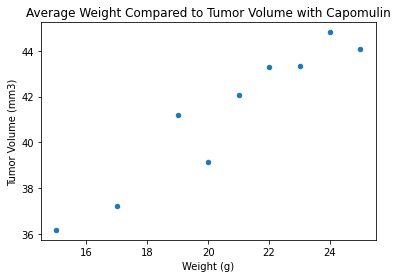

In [342]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = clean_combined_df[clean_combined_df["Drug Regimen"]=="Capomulin"]
cap_weight_df = cap_df[["Weight (g)","Tumor Volume (mm3)"]]
cap_weight_gp = cap_weight_df.groupby("Weight (g)").mean().reset_index()
cap_weight_gp.plot.scatter(x="Weight (g)",y="Tumor Volume (mm3)")
plt.title("Average Weight Compared to Tumor Volume with Capomulin")
plt.ylabel('Tumor Volume (mm3)')

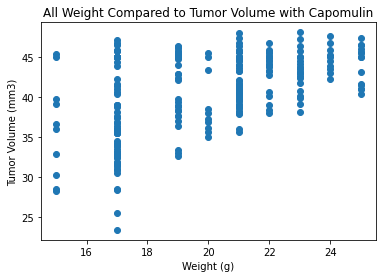

In [343]:
# For the first example, determine which pairs of factors are correlated. 
weight = cap_weight_df.iloc[:,0]
tumor_sz = cap_weight_df.iloc[:,1]
plt.scatter(weight,tumor_sz)
plt.title("All Weight Compared to Tumor Volume with Capomulin")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

In [344]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = cap_weight_df.iloc[:,0]
tumor_sz = cap_weight_df.iloc[:,1]
correlation = st.pearsonr(weight,tumor_sz)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


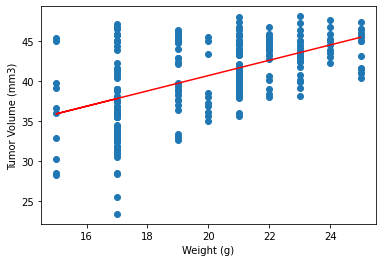

The Linear regression formula is y = 0.96x + 21.49
The r-squared is: 0.27636002234559154


In [366]:
x_values = weight
y_values = tumor_sz
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
print(f"The Linear regression formula is {line_eq}")
print(f"The r-squared is: {rvalue**2}")